In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.3.1
sys.version_info(major=3, minor=6, micro=7, releaselevel='final', serial=0)
matplotlib 3.3.2
numpy 1.18.4
pandas 1.1.4
sklearn 0.23.2
tensorflow 2.3.1
tensorflow.keras 2.4.0


In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
from sklearn.model_selection import train_test_split

xtrain_all, xtest, ytrain_all, ytest = train_test_split(
    housing.data, housing.target, random_state=7)
xtrain, xvalid, ytrain, yvalid = train_test_split(
    xtrain_all ,ytrain_all, random_state=11)
print(xtrain.shape, ytrain.shape)
print(xvalid.shape, yvalid.shape)
print(xtest.shape, ytest.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xvalid_scaled= scaler.transform(xvalid)
xtest_scaled = scaler.transform(xtest)

In [10]:
# Subclass API
class WideDeepModel(keras.models.Model):
    def __init__(self):
        super(WideDeepModel, self).__init__()
        """定义模型的层次"""
        self.hidden1_layer = keras.layers.Dense(30, activation='relu')
        self.hidden2_layer = keras.layers.Dense(30, activation='relu')
        self.output_layer = keras.layers.Dense(1)
        
    def call(self, input):
        """完成模型的正向计算"""
        hidden1 = self.hidden1_layer(input)
        hidden2 = self.hidden2_layer(hidden1)
        concat = keras.layers.concatenate([input, hidden2])
        output = self.output_layer(concat)
        return output
    
model = WideDeepModel()
# 也可以：
# model = keras.models.Sequential([
#     WideDeepModel(),
# ])
model.build(input_shape=(None, 8))

model.summary()
model.compile(loss="mean_squared_error", 
              optimizer = keras.optimizers.SGD(0.001))
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-5)]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
wide_deep_model_1 (WideDeepM (None, 1)                 1239      
Total params: 1,239
Trainable params: 1,239
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(xtrain_scaled, ytrain, 
                    validation_data=(xvalid_scaled, yvalid),
                    epochs=100, callbacks=callbacks)

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 1.6010 - val_loss: 0.7858
Epoch 2/100
363/363 [==============================] - 0s 752us/step - loss: 0.6618 - val_loss: 0.6828
Epoch 3/100
363/363 [==============================] - 0s 753us/step - loss: 0.6010 - val_loss: 0.6283
Epoch 4/100
363/363 [==============================] - 0s 769us/step - loss: 0.5631 - val_loss: 0.5974
Epoch 5/100
363/363 [==============================] - 0s 774us/step - loss: 0.5383 - val_loss: 0.5775
Epoch 6/100
363/363 [==============================] - 0s 780us/step - loss: 0.5198 - val_loss: 0.5553
Epoch 7/100
363/363 [==============================] - 0s 763us/step - loss: 0.5064 - val_loss: 0.5424
Epoch 8/100
363/363 [==============================] - 0s 820us/step - loss: 0.4942 - val_loss: 0.5277
Epoch 9/100
363/363 [==============================] - 0s 799us/step - loss: 0.4850 - val_loss: 0.5245
Epoch 10/100
363/363 [==============================] - 0s 755us/step - los

Epoch 80/100
363/363 [==============================] - 0s 793us/step - loss: 0.3622 - val_loss: 0.3769
Epoch 81/100
363/363 [==============================] - 0s 802us/step - loss: 0.3615 - val_loss: 0.3754
Epoch 82/100
363/363 [==============================] - 0s 791us/step - loss: 0.3622 - val_loss: 0.3735
Epoch 83/100
363/363 [==============================] - 0s 767us/step - loss: 0.3610 - val_loss: 0.3739
Epoch 84/100
363/363 [==============================] - 0s 799us/step - loss: 0.3608 - val_loss: 0.3744
Epoch 85/100
363/363 [==============================] - 0s 776us/step - loss: 0.3597 - val_loss: 0.3732
Epoch 86/100
363/363 [==============================] - 0s 766us/step - loss: 0.3597 - val_loss: 0.3730
Epoch 87/100
363/363 [==============================] - 0s 743us/step - loss: 0.3593 - val_loss: 0.3736
Epoch 88/100
363/363 [==============================] - 0s 740us/step - loss: 0.3589 - val_loss: 0.3711
Epoch 89/100
363/363 [==============================] - 0s 747us

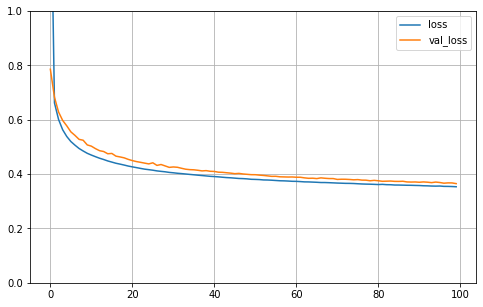

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

In [9]:
model.evaluate(xtest_scaled, ytest, verbose=0)

0.37572652101516724